In [127]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

fedrate_df = pd.read_csv(r"C:\Users\home\workspace\FED-Interest-Rate\data\FedReserveHackathonData.csv")

In [132]:
def print_OLS_model(removedItem = None):
    xcolumns = ['GDPDeflat','CPIRate','PCEDRate','UnemployRate','ECI', 'InflationRate']
    if(removedItem != None):
        xcolumns.remove(removedItem)
    predictors = pd.DataFrame(fedrate_df, columns = xcolumns)
    ycolumns = ['FedFundsRate']
    response = pd.DataFrame(fedrate_df, columns = ycolumns)
    
    # OLS
    lin_model = sm.OLS(response, predictors).fit()
    print(lin_model.summary())

print_OLS_model(None)

                            OLS Regression Results                            
Dep. Variable:           FedFundsRate   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     273.9
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           4.08e-18
Time:                        14:37:56   Log-Likelihood:                -32.758
No. Observations:                  26   AIC:                             77.52
Df Residuals:                      20   BIC:                             85.07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
GDPDeflat         4.1366      0.600      6.893

               GDPDeflat   CPIRate  PCEDRate  UnemployRate       ECI  \
GDPDeflat       1.000000  0.998494  0.999080     -0.718384  0.992992   
CPIRate         0.998494  1.000000  0.997893     -0.713574  0.993855   
PCEDRate        0.999080  0.997893  1.000000     -0.727723  0.988055   
UnemployRate   -0.718384 -0.713574 -0.727723      1.000000 -0.695810   
ECI             0.992992  0.993855  0.988055     -0.695810  1.000000   
InflationRate  -0.672153 -0.668419 -0.681448      0.401935 -0.632817   

               InflationRate  
GDPDeflat          -0.672153  
CPIRate            -0.668419  
PCEDRate           -0.681448  
UnemployRate        0.401935  
ECI                -0.632817  
InflationRate       1.000000  


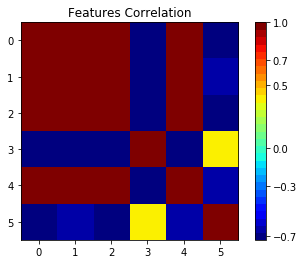

In [102]:
def correlation_matrix(dataframe):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(dataframe.corr(), interpolation="nearest", cmap = cmap)
    plt.title('Features Correlation')
    labels = ['GDP Deflation','CPI Rate','PCED Rate','Unemploy Rate','ECI', 'Inflation Rate']
    fig.colorbar(cax, ticks=[-.7, -.3, 0, .5, .7, 1])
    plt.show()

print(predictors.corr())
correlation_matrix(predictors)


In [134]:
# Feature Selection
xcolumns = ['GDPDeflat','CPIRate','PCEDRate','UnemployRate','ECI', 'InflationRate']
print_OLS_model('GDPDeflat')
print_OLS_model('CPIRate')
print_OLS_model('PCEDRate')
print_OLS_model('UnemployRate')
print_OLS_model('ECI')
print_OLS_model('InflationRate')

                            OLS Regression Results                            
Dep. Variable:           FedFundsRate   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     99.28
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           6.99e-14
Time:                        14:54:05   Log-Likelihood:                -48.573
No. Observations:                  26   AIC:                             107.1
Df Residuals:                      21   BIC:                             113.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
CPIRate           0.2108      0.240      0.878